# Basic Statistics on the Warp Routes
This notebook provides basic statistics on the Warp routes. We will investigate first-level statistics such as the number of unique assets and routes.

In [202]:
import pandas as pd

# Load the CSV file (make sure the path is correct if your file is elsewhere)
# df = pd.read_csv("data/bquxjob_6d1f9d31_19685a5680f.csv")
df = pd.read_csv("data/bq-results-20250430-073657-1745998667647.csv")
# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

df

,route_id,origin,destination,amount,asset,time
0,celestia/arbitrum-neutron,neutron,arbitrum,19.000000,celestia,2025-04-30 05:53:41+00:00
1,celestia/arbitrum-neutron,neutron,arbitrum,11.700000,celestia,2025-04-30 05:45:04+00:00
2,ethereum/arbitrum-base,arbitrum,base,0.007000,ethereum,2025-04-30 05:50:18+00:00
3,hyperlane/arbitrum-base,arbitrum,base,1376.137940,hyperlane,2025-04-30 05:52:09+00:00
4,hyperlane/arbitrum-bsc,arbitrum,bsc,45.156000,hyperlane,2025-04-30 05:03:15+00:00
...,...,...,...,...,...,...
6056854,ethereum/bob-zetachain,bob,zetachain,0.148500,ethereum,2024-07-30 22:48:37+00:00
6056855,ethereum/bob-zetachain,bob,zetachain,0.498895,ethereum,2024-07-30 08:56:49+00:00
6056856,ethereum/bob-zetachain,bob,zetachain,0.050000,ethereum,2024-07-29 10:11:53+00:00
6056857,ethereum/bob-zetachain,bob,zetachain,0.089315,ethereum,2024-07-25 12:12:27+00:00


In [203]:
# Number of unique assets
num_assets = df['asset'].nunique()

# Number of unique routes
num_routes = df['route_id'].nunique()

# Number of messages sent
total_messages = len(df)

print(f"Number of unique assets: {num_assets}")
print(f"Number of unique routes: {num_routes}")
print(f"Total warp transfers sent: {total_messages}")

Number of unique assets: 57
Number of unique routes: 547
Total warp transfers sent: 6056859


## Warp Route Usage

In [204]:
# Count the number of messages per route
messages_per_route = df['route_id'].value_counts()
messages_per_route

route_id
injective-protocol/inevm-injective        1086463
celestia/arbitrum-neutron                 1064601
celestia/mantapacific-neutron              369020
celestia/forma-stride                      338985
solana/eclipsemainnet-solanamainnet        261601
                                           ...   
ethereum/blast-scroll                           1
openusdt/ink-mode                               1
renzo-restaked-eth/ethereum-worldchain          1
usd-coin/bsc-polygon                            1
ethereum/blast-ethereum                         1
Name: count, Length: 547, dtype: int64

In [205]:
assets_transferred = df['asset'].value_counts()
assets_transferred

asset
celestia                         1813870
ethereum                         1683161
injective-protocol               1086463
renzo-restaked-eth                613265
solana                            292330
usd-coin                          245116
hyperlane                          98362
magic                              79820
openusdt                           32889
tether                             25230
eclipse-fi                         22888
official-trump                     20345
dogwifcoin                          6938
orca                                4753
kyros-restaked-sol                  4340
aixbt-by-virtuals                   3568
artela-network                      3101
stride-staked-tia                   2996
bonk                                1830
polygon-ecosystem-token             1766
game-by-virtuals                    1498
sonic-svm                           1318
renzo-restaked-sol                  1292
cod3x                               1272
elixir-deu

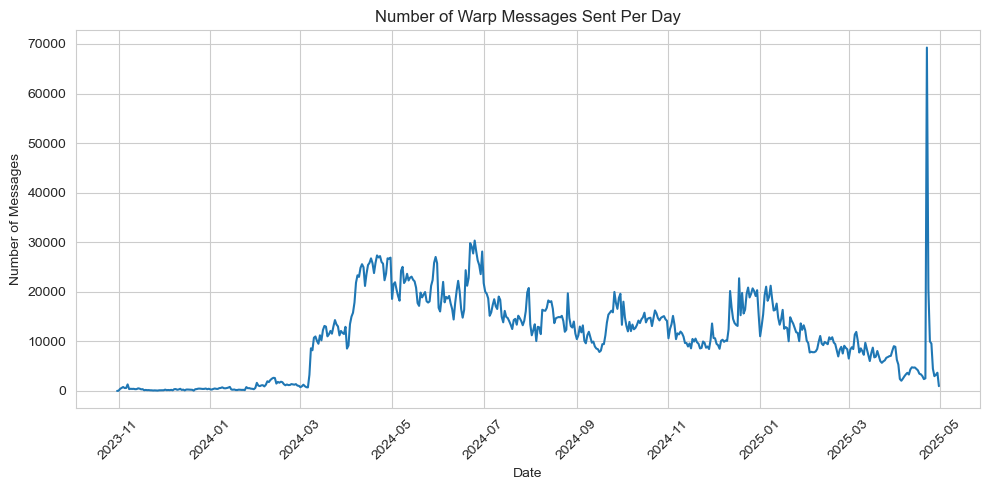

In [206]:
from matplotlib import pyplot as plt

# Extract the date only (no time)
df['date'] = df['time'].dt.date

# Count number of messages per day
messages_per_day = df.groupby('date').size()

# Plotting the messages per day as a line chart
plt.figure(figsize=(10, 5))
messages_per_day.plot(kind='line')
plt.title('Number of Warp Messages Sent Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

Text(147.31597222222223, 0.5, 'Day of Week')

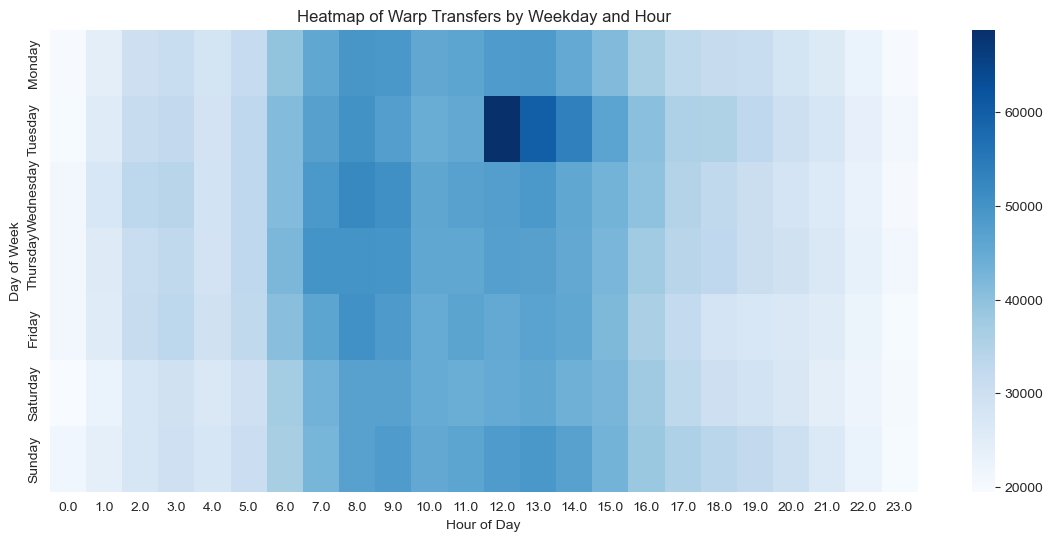

In [207]:
import seaborn as sns

# Extract weekday and hour from the time column
df['weekday'] = df['time'].dt.day_name()
df['hour'] = df['time'].dt.hour

# Create a pivot table with weekdays as rows and hours as columns
heatmap_data = df.pivot_table(index='weekday', columns='hour', values='route_id', aggfunc='count', fill_value=0)

# Reorder weekdays to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plotting the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="Blues", fmt='d')
plt.title('Heatmap of Warp Transfers by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

## Asset Analysis

/var/folders/gb/r3pt61qd18qczfr_d6rx8gpc0000gn/T/ipykernel_26138/18067397.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


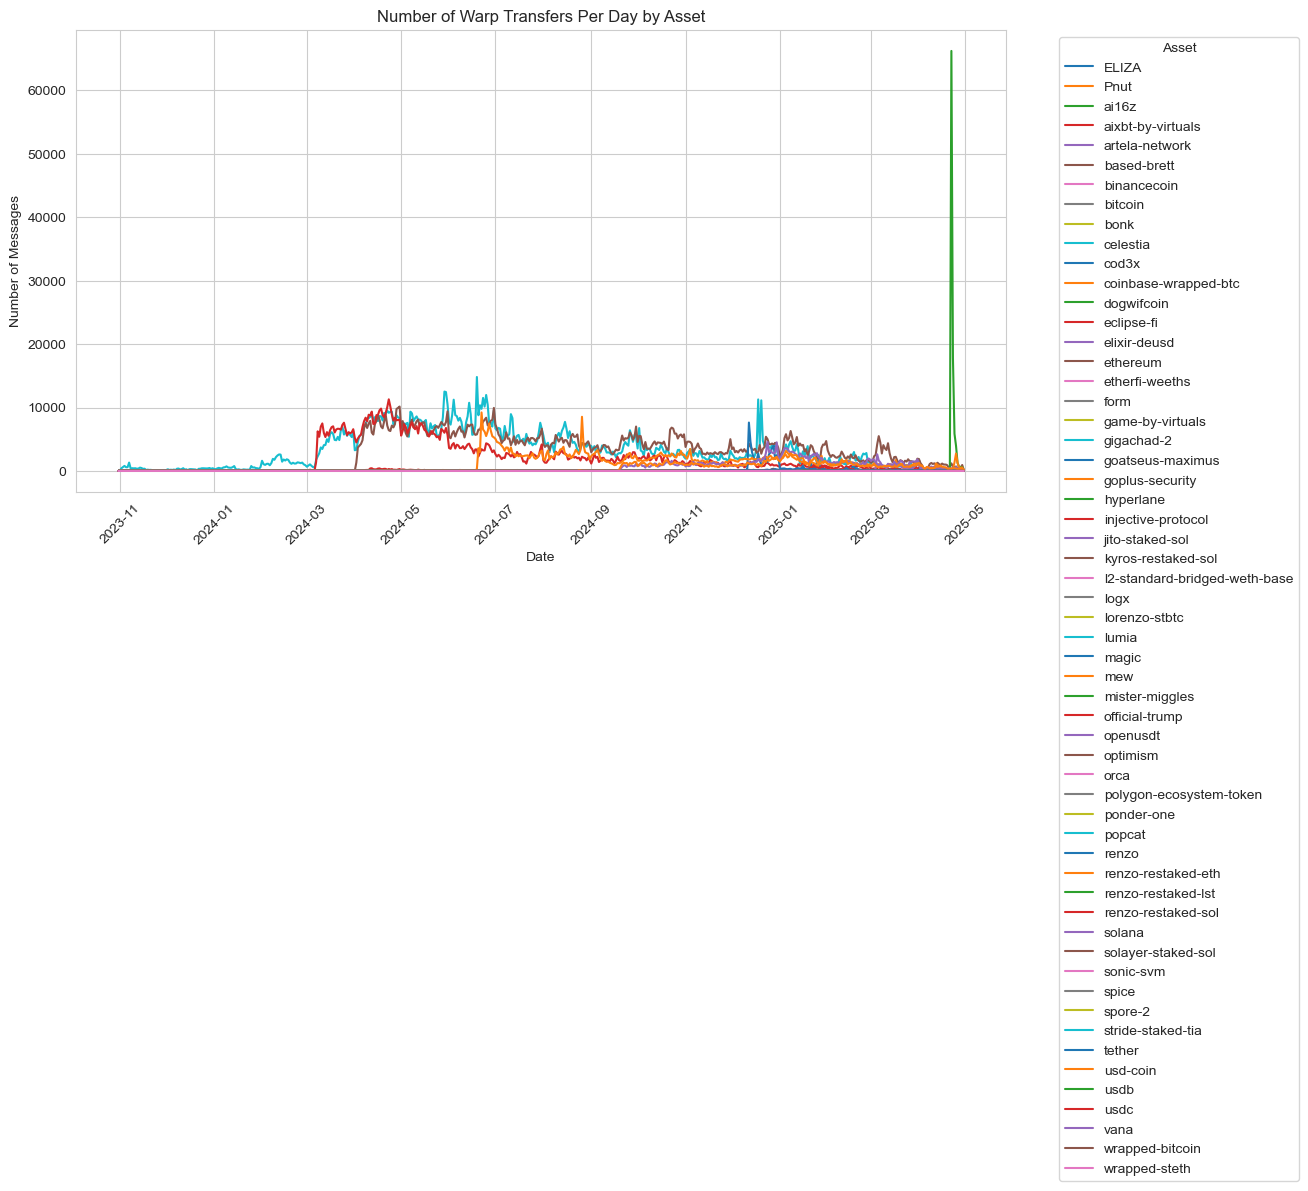

In [208]:
assets_per_day = df.groupby(['date', 'asset']).size().unstack(fill_value=0)
assets_per_day.plot(kind='line', figsize=(12, 6))
plt.title('Number of Warp Transfers Per Day by Asset')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Asset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

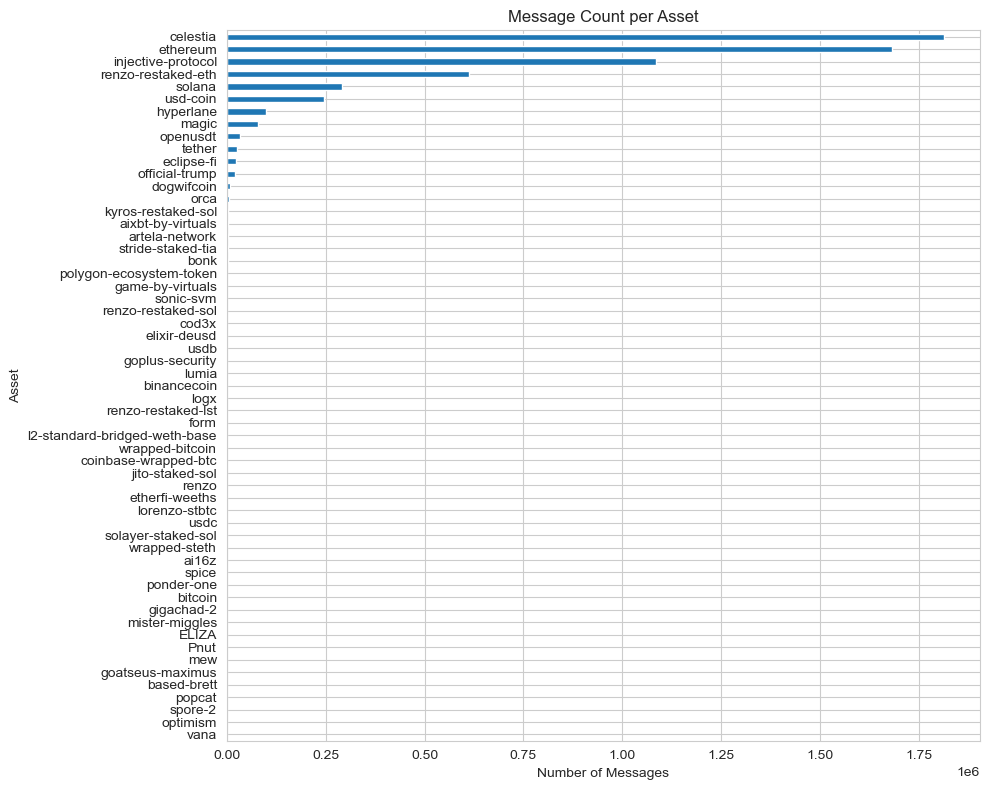

In [209]:
# Clean asset names
asset_counts = df['asset'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
asset_counts.plot(kind='barh')
plt.title('Message Count per Asset')
plt.xlabel('Number of Messages')
plt.ylabel('Asset')
plt.gca().invert_yaxis()  # Highest count at the top
plt.tight_layout()

## Origin and Destination Analysis

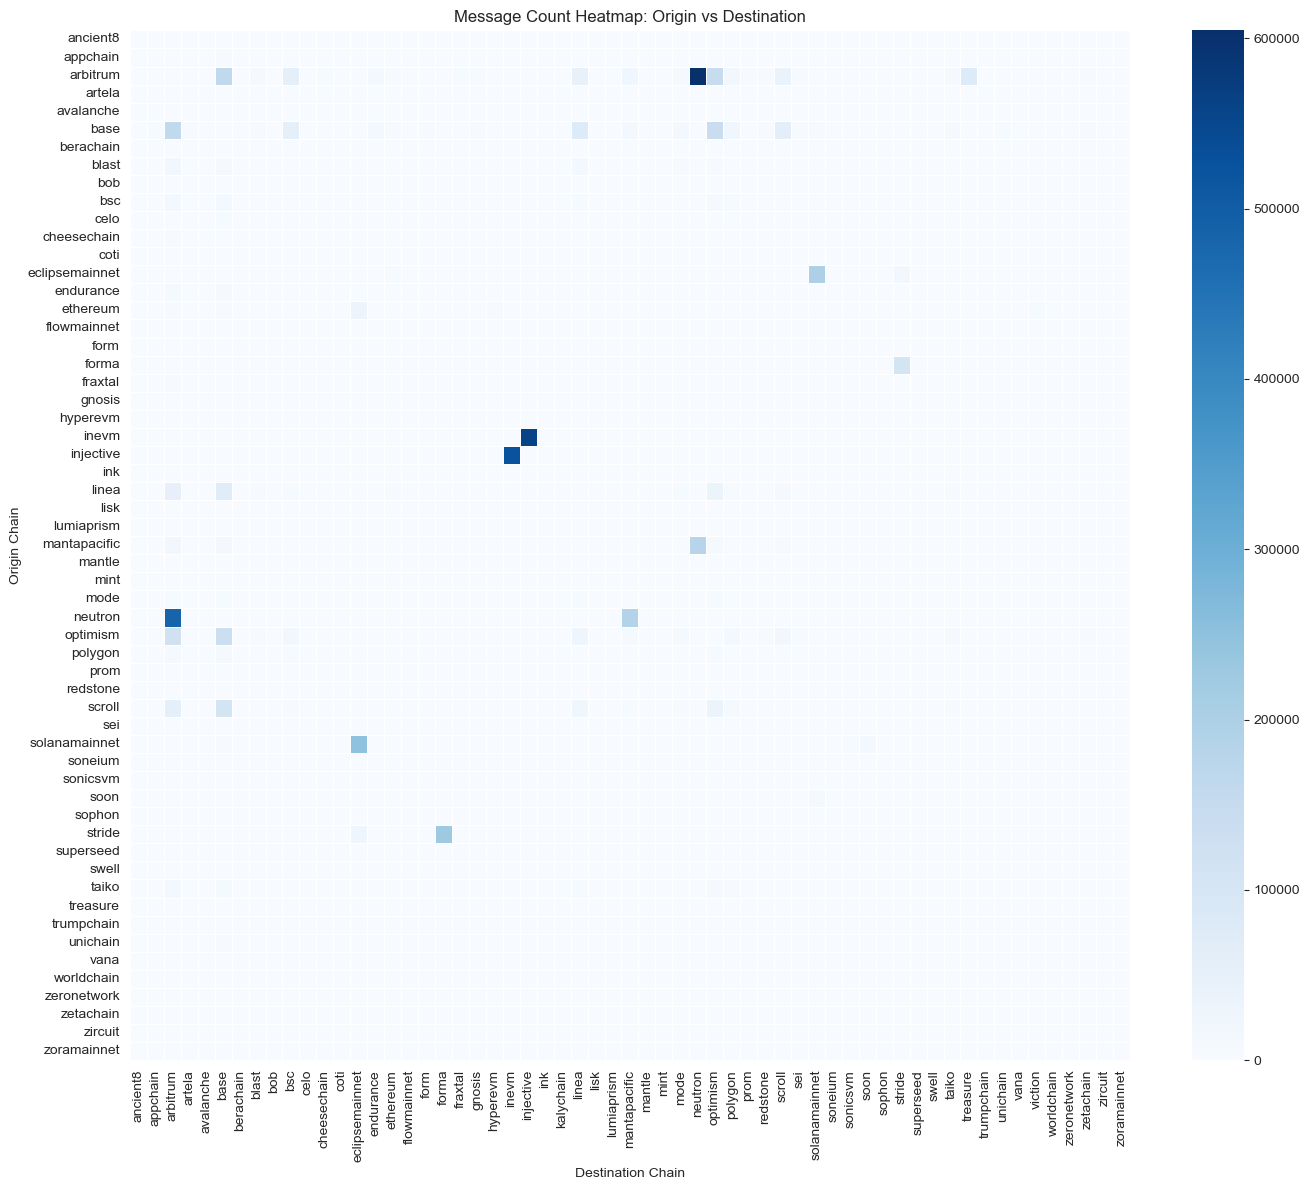

In [210]:
# If each row is a message, group by origin/destination
heatmap_data = df.groupby(['origin', 'destination']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, fmt='d', cmap='Blues', linewidths=.5)

plt.title('Message Count Heatmap: Origin vs Destination')
plt.xlabel('Destination Chain')
plt.ylabel('Origin Chain')
plt.tight_layout()

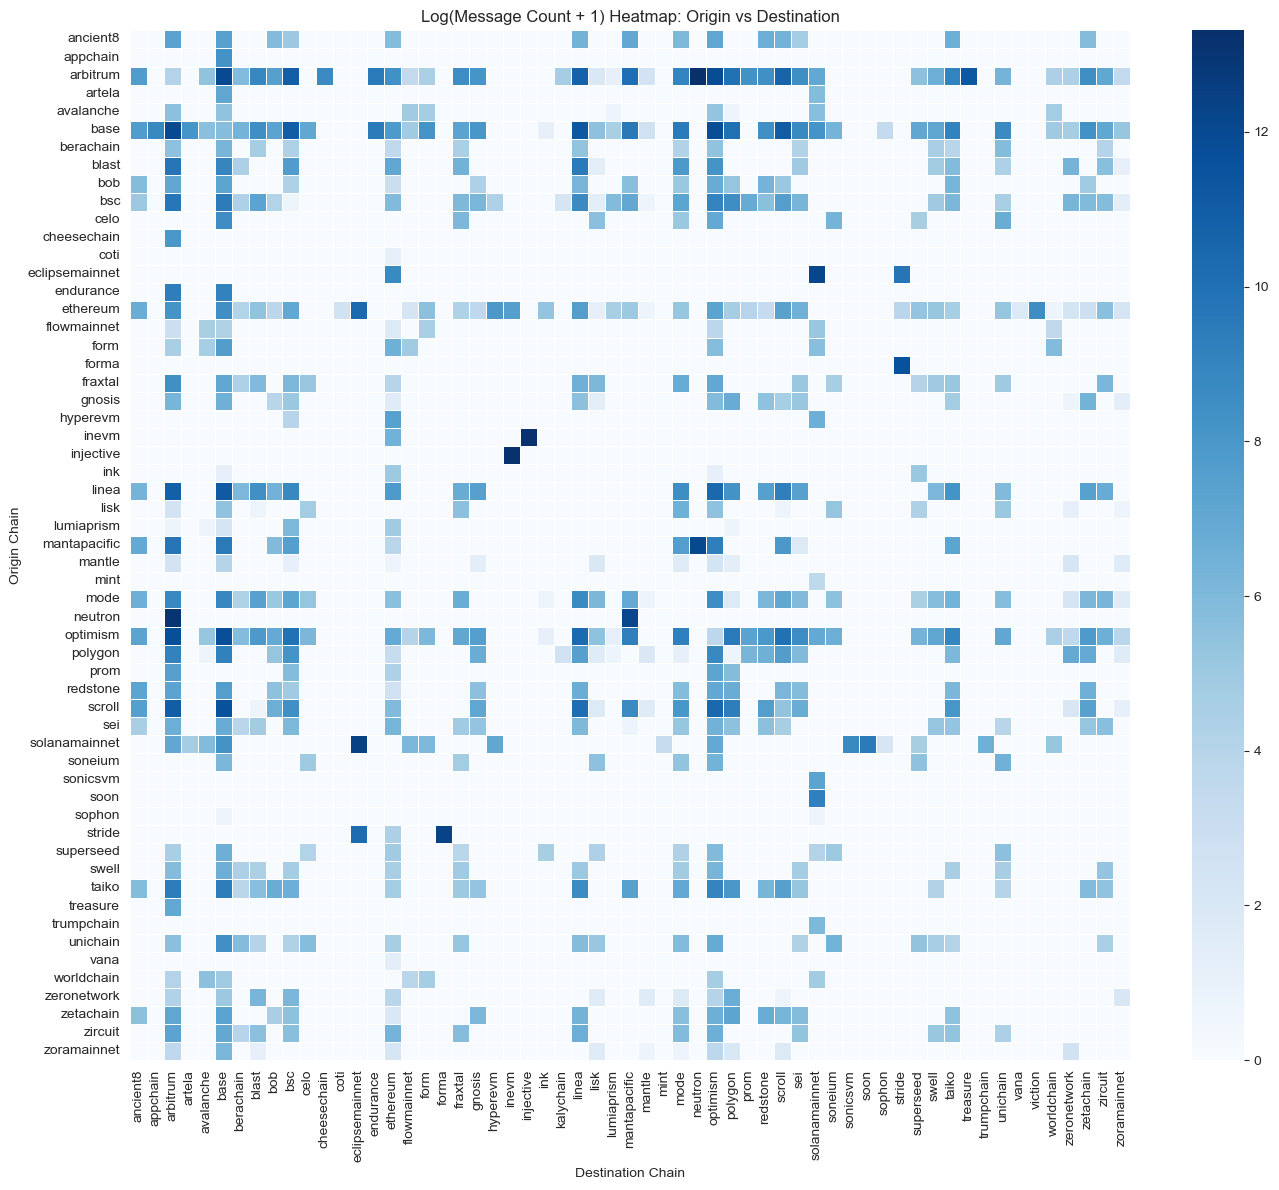

In [211]:
import numpy as np
# Apply log transformation — add 1 to avoid log(0)
log_heatmap_data = np.log1p(heatmap_data)

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(log_heatmap_data, fmt=".1f", cmap='Blues', linewidths=.5)

plt.title('Log(Message Count + 1) Heatmap: Origin vs Destination')
plt.xlabel('Destination Chain')
plt.ylabel('Origin Chain')
plt.tight_layout()

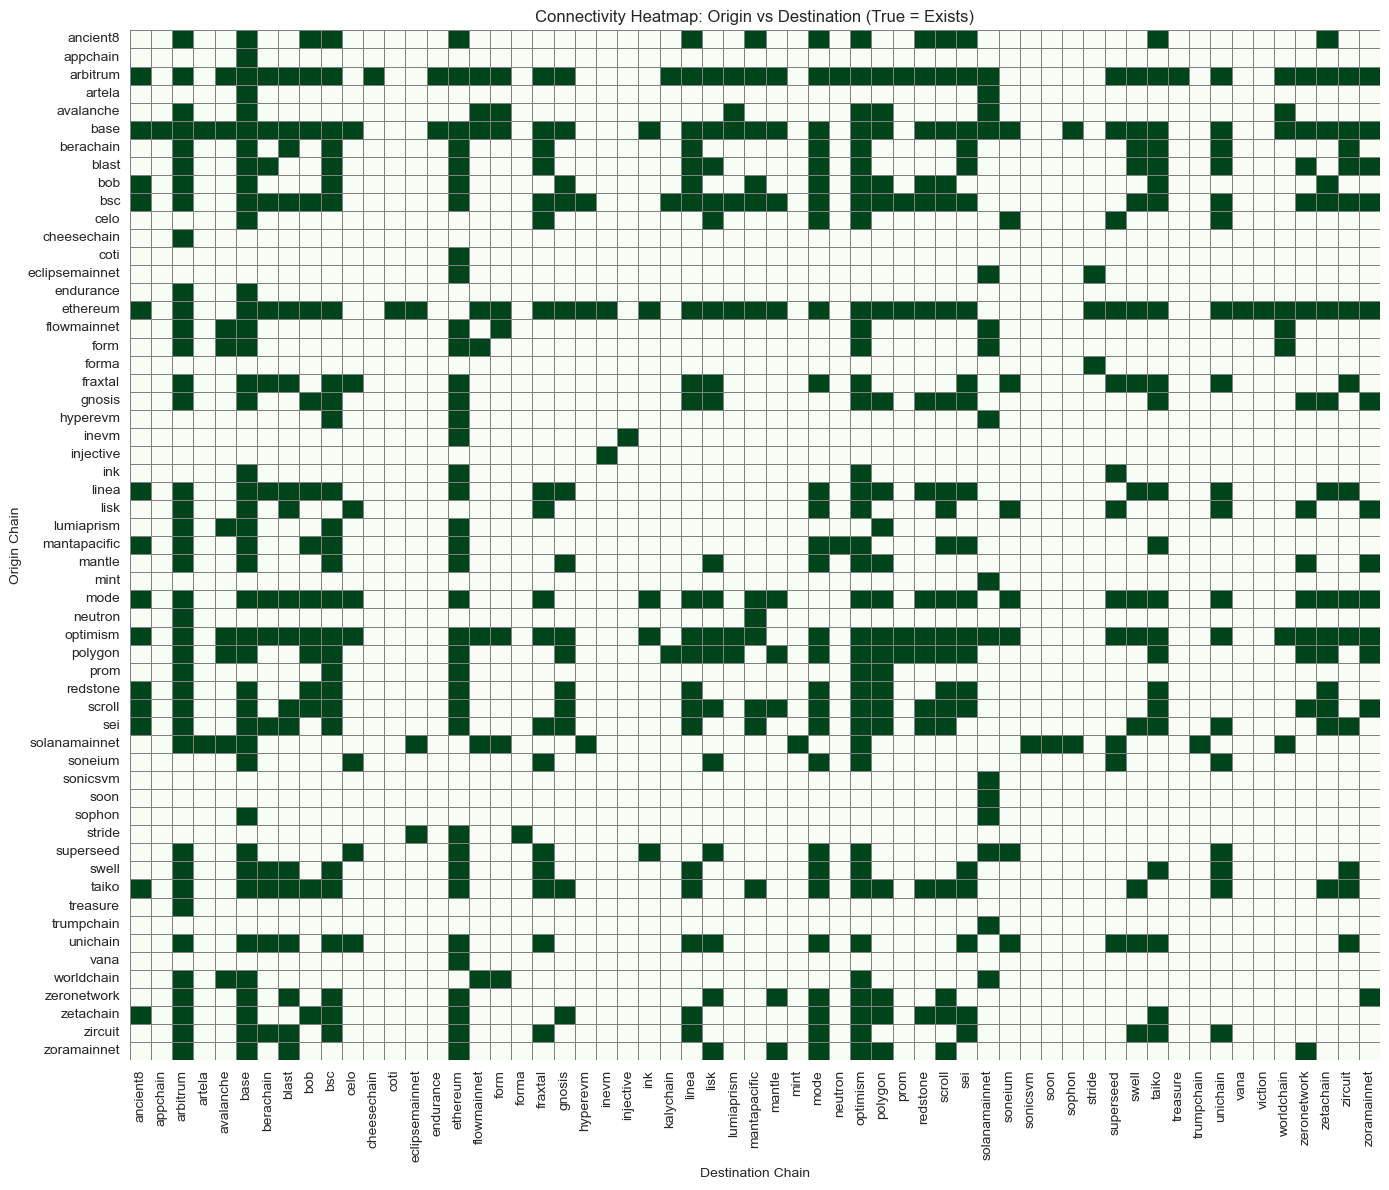

In [212]:
connectivity = heatmap_data > 0  # Convert counts to True/False

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(connectivity, cmap='Greens', linewidths=.5, linecolor='grey', cbar=False)

plt.title('Connectivity Heatmap: Origin vs Destination (True = Exists)')
plt.xlabel('Destination Chain')
plt.ylabel('Origin Chain')
plt.tight_layout()

# Route Analysis

## Survival Analysis
Survival analysis is a statistical method used to analyze time-to-event data — where the goal is to understand how long something lasts before a particular event occurs. In this context, we use survival analysis to measure how long a Warp route stays active before becoming inactive (i.e., no messages for 30+ days).

It allows us to:

* Estimate the probability a route remains active over time.

* Compare survival curves across different assets, chains, or behaviors.

* Model the risk of deactivation using historical activity patterns.

This is especially useful in product analytics, infrastructure monitoring, and user behavior modeling.

In [218]:
df['date'] = pd.to_datetime(df['date'])

# Group by route and get first and last message dates
route_lifespans = df.groupby('route_id').agg(
    first_seen=('date', 'min'),
    last_seen=('date', 'max')
).reset_index()

# Add duration in days
route_lifespans['duration_days'] = (route_lifespans['last_seen'] - route_lifespans['first_seen']).dt.days

# Add "event_occurred" flag: True if no message in last 30 days
cutoff = df['date'].max() - pd.Timedelta(days=30)
route_lifespans['inactive'] = route_lifespans['last_seen'] < cutoff
route_lifespans

,route_id,first_seen,last_seen,duration_days,inactive
0,ELIZA/solanamainnet-soon,2025-03-27,2025-04-10,14,False
1,Pnut/solanamainnet-soon,2025-03-27,2025-04-10,14,False
2,ai16z/solanamainnet-soon,2025-03-28,2025-04-25,28,False
3,aixbt-by-virtuals/base-form,2025-01-09,2025-04-29,110,False
4,artela-network/artela-base,2025-01-15,2025-04-29,104,False
...,...,...,...,...,...
542,wrapped-bitcoin/ethereum-hyperevm,2025-02-19,2025-04-27,67,False
543,wrapped-bitcoin/mode-scroll,2024-11-07,2024-11-07,0,True
544,wrapped-bitcoin/mode-zeronetwork,2024-11-07,2024-11-07,0,True
545,wrapped-bitcoin/scroll-zeronetwork,2024-11-07,2024-11-07,0,True


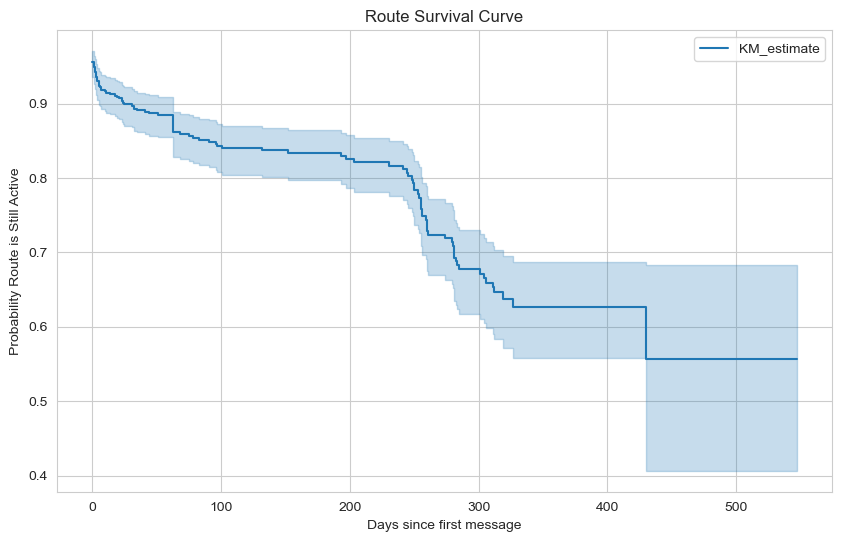

In [219]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=route_lifespans['duration_days'], event_observed=route_lifespans['inactive'])
# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Route Survival Curve')
plt.xlabel('Days since first message')
plt.ylabel('Probability Route is Still Active')
plt.grid(True)

### Warp Route Age (Including inactive routes)

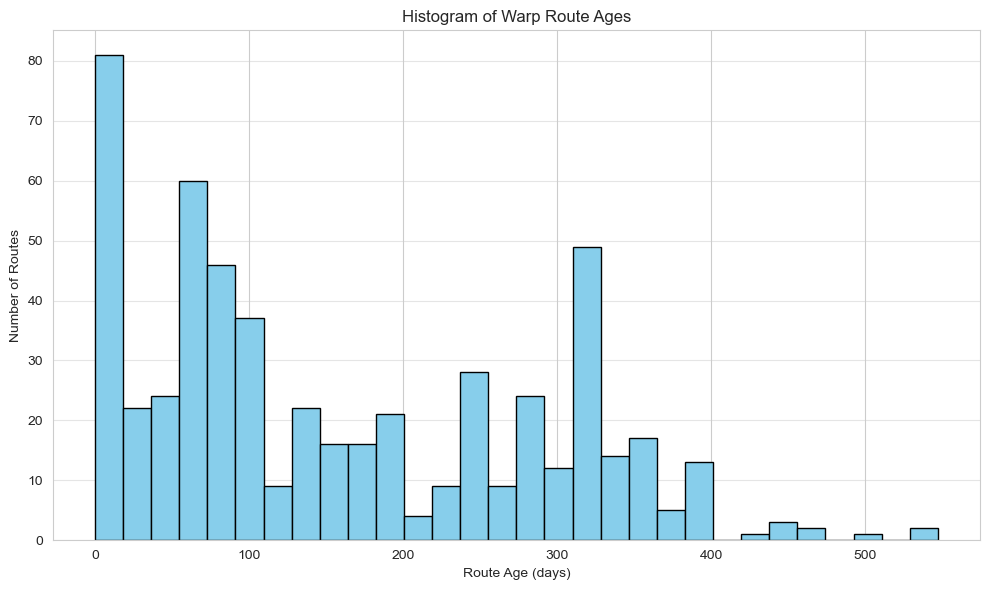

In [220]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(route_lifespans['duration_days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Warp Route Ages')
plt.xlabel('Route Age (days)')
plt.ylabel('Number of Routes')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## Cohort Analysis

We will analyze the activity of Warp routes over time. The goal is to understand how many messages are sent per route, and how this changes over time. All routes are aligned by their first message date, and we will track the number of messages sent on each subsequent day. This allows us to see the activity patterns of different routes and identify any trends or anomalies.

In [221]:
# STEP 1: Get first and last active day per route
route_activity_span = df.groupby('route_id')['date'].agg(['min', 'max']).reset_index()
route_activity_span['days_active'] = (route_activity_span['max'] - route_activity_span['min']).dt.days

# STEP 2: Build full index with all valid (route, days_since_first_message)
full_index = pd.concat([
    pd.DataFrame({
        'route_id': [row['route_id']] * (row['days_active'] + 1),
        'days_since_first_message': list(range(row['days_active'] + 1))
    })
    for _, row in route_activity_span.iterrows()
], ignore_index=True)

# STEP 3: Create actual cohort stats from main df
df['cohort'] = df.groupby('route_id')['date'].transform('min')
df['days_since_first_message'] = (df['date'] - df['cohort']).dt.days
cohort_stats = df.groupby(['route_id', 'days_since_first_message']).size().reset_index(name='messages_sent')

# STEP 4: Merge full index with actual data and fill missing days with 0
cohort_complete = pd.merge(full_index, cohort_stats, on=['route_id', 'days_since_first_message'], how='left')
cohort_complete['messages_sent'] = cohort_complete['messages_sent'].fillna(0).astype(int)
cohort_complete

,route_id,days_since_first_message,messages_sent
0,ELIZA/solanamainnet-soon,0,2
1,ELIZA/solanamainnet-soon,1,0
2,ELIZA/solanamainnet-soon,2,0
3,ELIZA/solanamainnet-soon,3,0
4,ELIZA/solanamainnet-soon,4,0
...,...,...,...
87066,wrapped-steth/ethereum-form,106,1
87067,wrapped-steth/ethereum-form,107,0
87068,wrapped-steth/ethereum-form,108,0
87069,wrapped-steth/ethereum-form,109,0


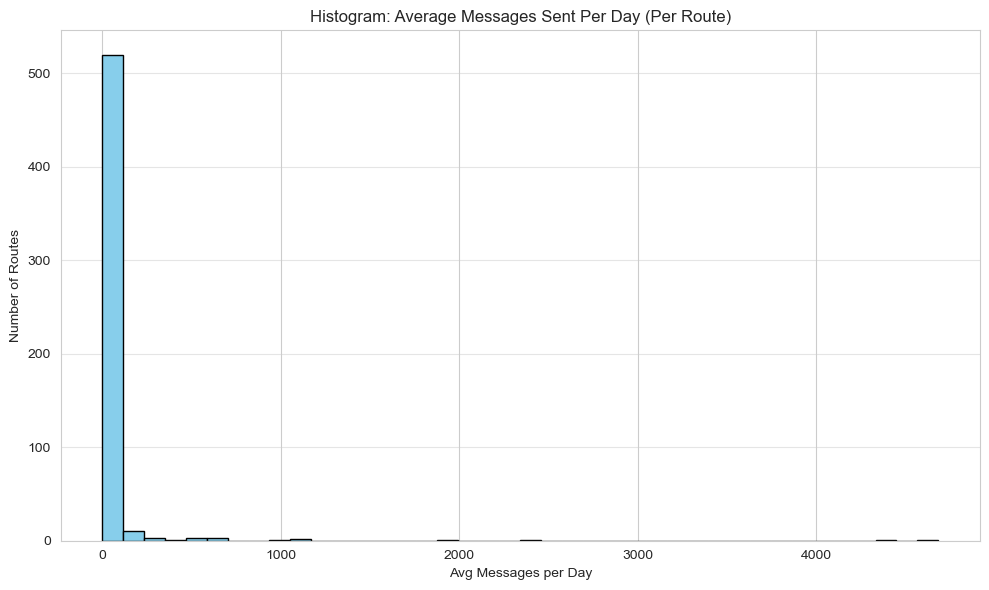

In [222]:
# 1. Total messages and active days per route from cohort_complete
route_summary = (
    cohort_complete.groupby('route_id')
    .agg(total_messages=('messages_sent', 'sum'),
         active_days=('days_since_first_message', 'max'))
    .reset_index()
)

# 2. Calculate average messages per day (add +1 to include day 0)
route_summary['avg_messages_per_day'] = route_summary['total_messages'] / (route_summary['active_days'] + 1)

# 3. Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(route_summary['avg_messages_per_day'], bins=40, color='skyblue', edgecolor='black')
plt.title('Histogram: Average Messages Sent Per Day (Per Route)')
plt.xlabel('Avg Messages per Day')
plt.ylabel('Number of Routes')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

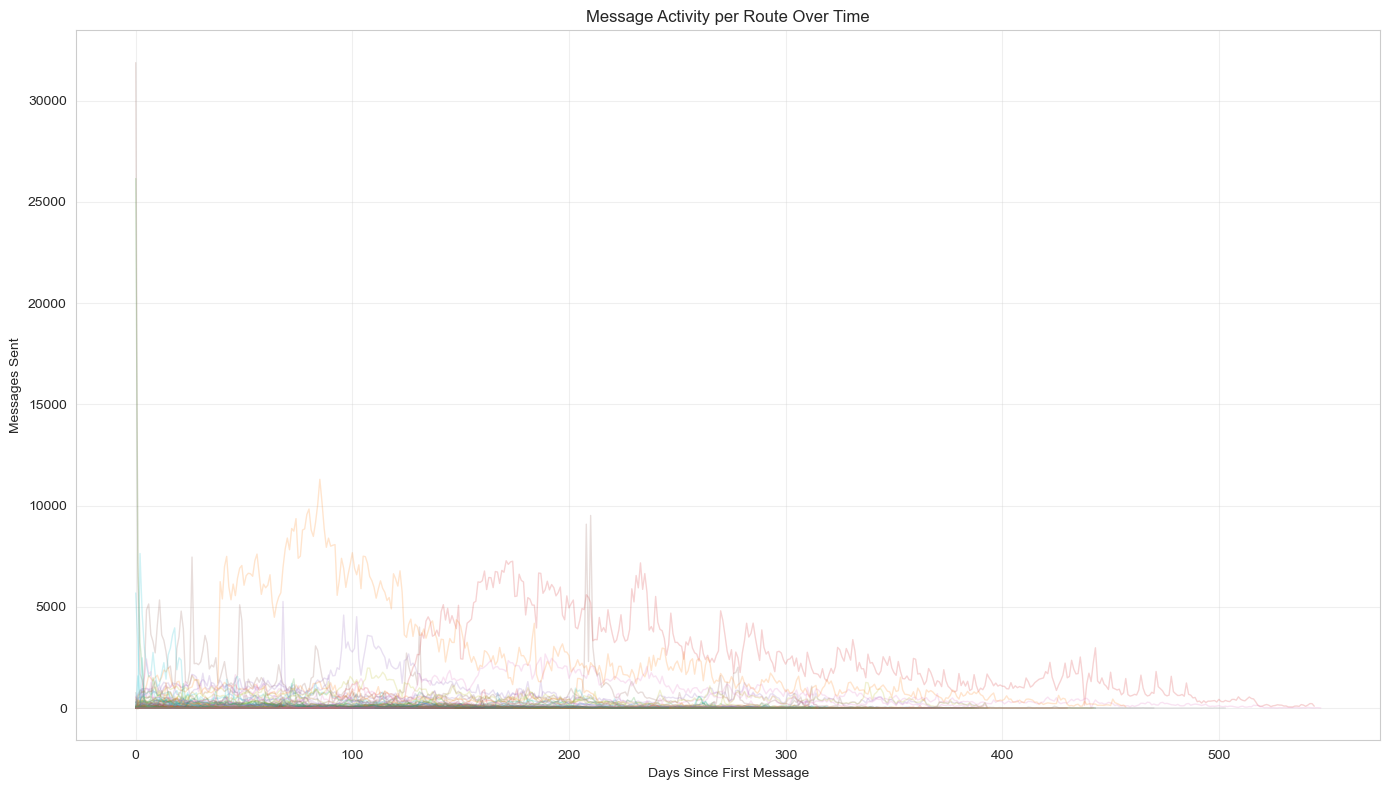

In [223]:
# Pivot the cohort data: one line per route
cohort_pivot = cohort_complete.pivot(index='days_since_first_message', columns='route_id', values='messages_sent')

# Plot
plt.figure(figsize=(14, 8))
plt.plot(cohort_pivot, alpha=0.2, linewidth=1)  # Light lines for all routes

plt.title('Message Activity per Route Over Time')
plt.xlabel('Days Since First Message')
plt.ylabel('Messages Sent')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

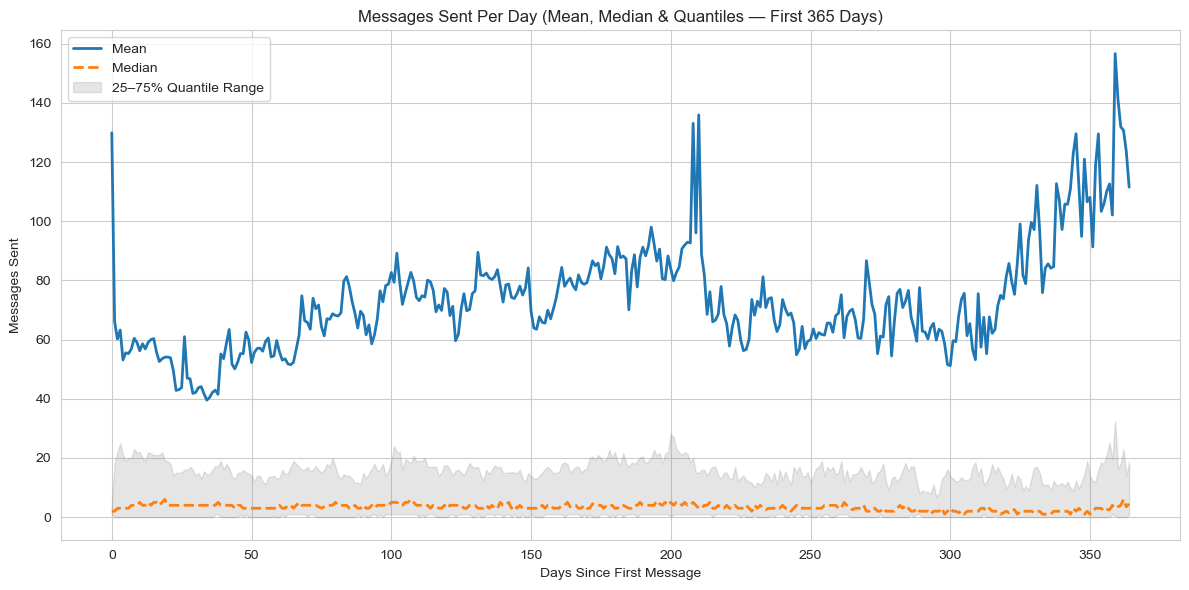

In [224]:
# Compute stats: mean, median, and 25th/75th percentiles per day
per_day_stats = (
    cohort_complete[cohort_complete['days_since_first_message'] <= 364]
    .groupby('days_since_first_message')['messages_sent']
    .agg(average='mean', median='median', q25=lambda x: x.quantile(0.25), q75=lambda x: x.quantile(0.75))
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))

# Mean and median lines
plt.plot(per_day_stats['days_since_first_message'], per_day_stats['average'], label='Mean', linewidth=2)
plt.plot(per_day_stats['days_since_first_message'], per_day_stats['median'], label='Median', linewidth=2, linestyle='--')

# Quantile band (25th–75th)
plt.fill_between(
    per_day_stats['days_since_first_message'],
    per_day_stats['q25'],
    per_day_stats['q75'],
    color='gray',
    alpha=0.2,
    label='25–75% Quantile Range'
)

# Formatting
plt.title('Messages Sent Per Day (Mean, Median & Quantiles — First 365 Days)')
plt.xlabel('Days Since First Message')
plt.ylabel('Messages Sent')
plt.legend()
plt.grid(True)
plt.tight_layout()

With the average so high above the median and quantiles I got the suspicion that there are a few outliers with very high activity. I used K-Means clustering to identify these outliers. The idea is to cluster the routes based on their activity shape and volume, and then analyze the clusters to find the most active ones.

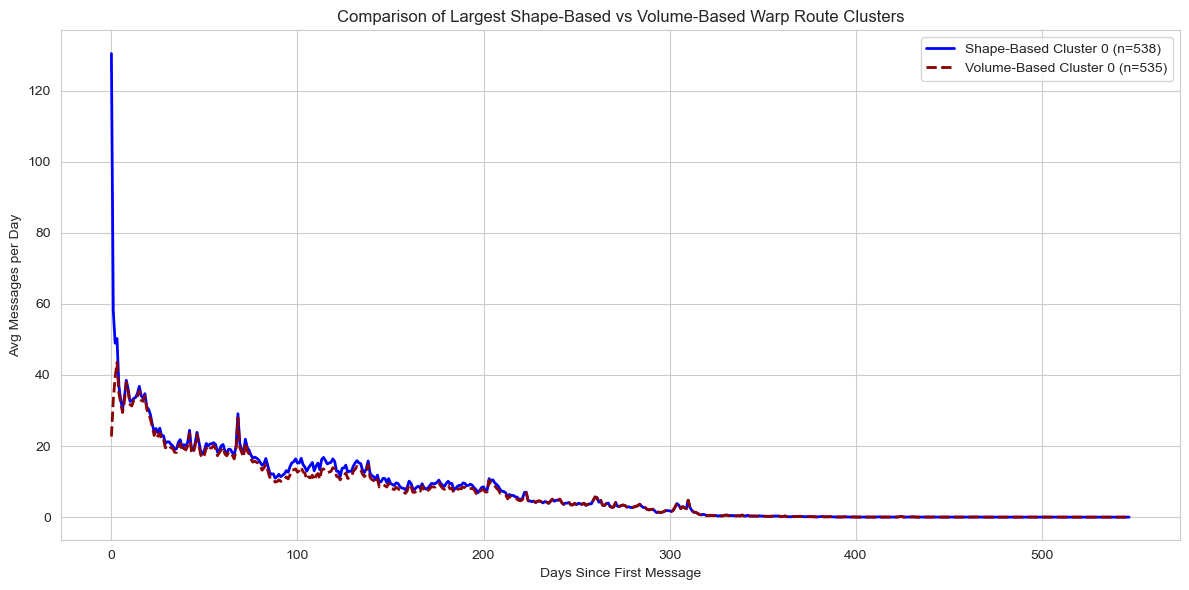

In [232]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

n_clusters = 5
# === Pivot route × days ===
pivot = cohort_complete.pivot(index='route_id', columns='days_since_first_message', values='messages_sent').fillna(0)

# IMPORTANT: FILLNA(0) with 0s will lead to a lowering mean

# === SHAPE-BASED CLUSTERING (normalized) ===
X_shape = StandardScaler().fit_transform(pivot.values)
kmeans_shape = KMeans(n_clusters=n_clusters, random_state=42)
pivot['shape_cluster'] = kmeans_shape.fit_predict(X_shape)

# Largest shape-based cluster
shape_largest_id = pivot['shape_cluster'].value_counts().idxmax()
shape_routes = pivot[pivot['shape_cluster'] == shape_largest_id].drop(columns='shape_cluster')
avg_shape = shape_routes.mean(axis=0)

# === VOLUME-BASED CLUSTERING (raw) ===
kmeans_volume = KMeans(n_clusters=n_clusters, random_state=42)
pivot['volume_cluster'] = kmeans_volume.fit_predict(pivot.drop(columns='shape_cluster'))

# Largest volume-based cluster
volume_largest_id = pivot['volume_cluster'].value_counts().idxmax()
volume_routes = pivot[pivot['volume_cluster'] == volume_largest_id].drop(columns=['shape_cluster', 'volume_cluster'])
avg_volume = volume_routes.mean(axis=0)

# === Plot both ===
plt.figure(figsize=(12, 6))
plt.plot(avg_shape.values, label=f'Shape-Based Cluster {shape_largest_id} (n={len(shape_routes)})', linewidth=2, color='blue')
plt.plot(avg_volume.values, label=f'Volume-Based Cluster {volume_largest_id} (n={len(volume_routes)})', linewidth=2, color='darkred', linestyle='--')
plt.title('Comparison of Largest Shape-Based vs Volume-Based Warp Route Clusters')
plt.xlabel('Days Since First Message')
plt.ylabel('Avg Messages per Day')
plt.legend()
plt.grid(True)
plt.tight_layout()

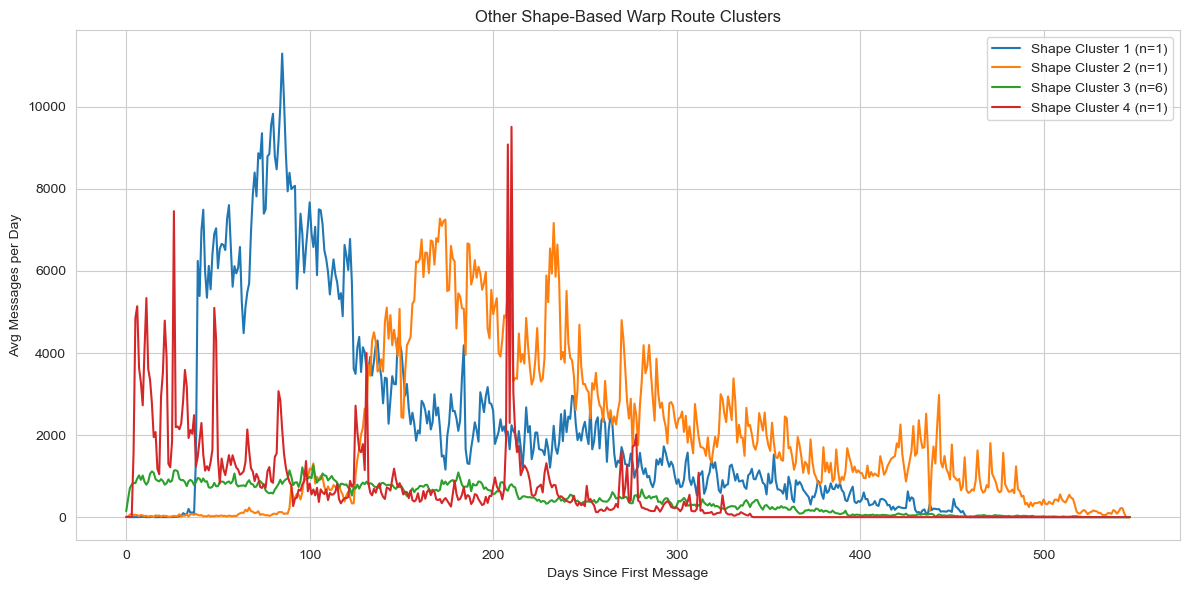

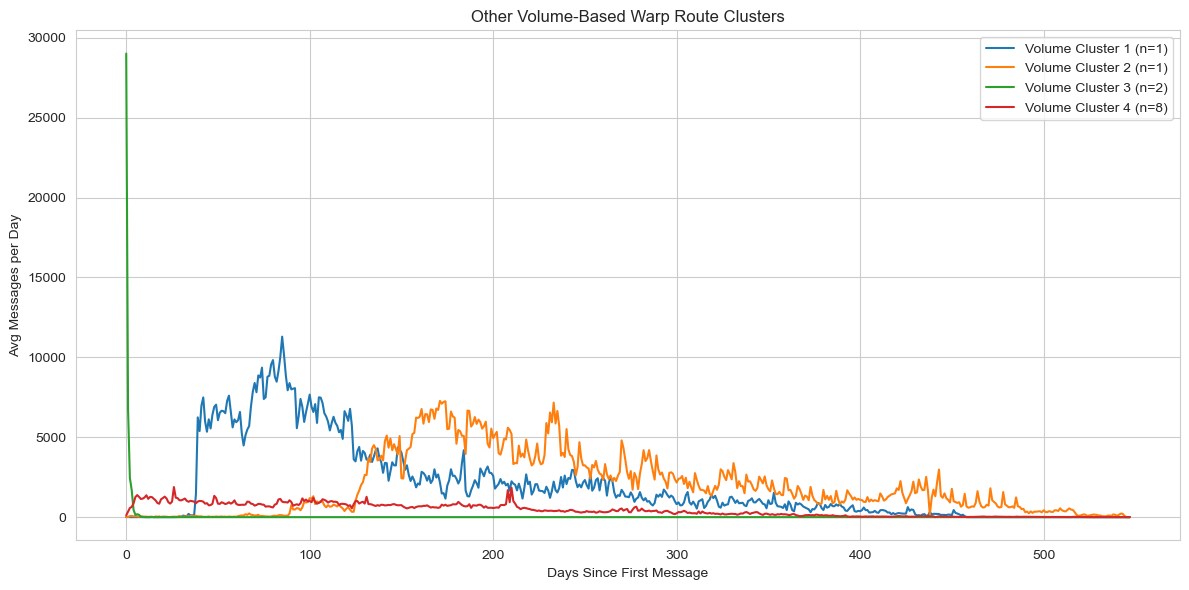

In [226]:
# === Plot REMAINING SHAPE-BASED CLUSTERS ===
plt.figure(figsize=(12, 6))
for cluster_id in range(n_clusters):
    if cluster_id == shape_largest_id:
        continue  # skip the largest
    cluster_routes = pivot[pivot['shape_cluster'] == cluster_id].drop(columns=['shape_cluster', 'volume_cluster'])
    avg_cluster = cluster_routes.mean(axis=0)
    plt.plot(avg_cluster.values, label=f'Shape Cluster {cluster_id} (n={len(cluster_routes)})')

plt.title('Other Shape-Based Warp Route Clusters')
plt.xlabel('Days Since First Message')
plt.ylabel('Avg Messages per Day')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot REMAINING VOLUME-BASED CLUSTERS ===
plt.figure(figsize=(12, 6))
for cluster_id in range(n_clusters):
    if cluster_id == volume_largest_id:
        continue  # skip the largest
    cluster_routes = pivot[pivot['volume_cluster'] == cluster_id].drop(columns=['shape_cluster', 'volume_cluster'])
    avg_cluster = cluster_routes.mean(axis=0)
    plt.plot(avg_cluster.values, label=f'Volume Cluster {cluster_id} (n={len(cluster_routes)})')

plt.title('Other Volume-Based Warp Route Clusters')
plt.xlabel('Days Since First Message')
plt.ylabel('Avg Messages per Day')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [227]:
# Identify routes NOT in the largest shape or volume cluster
non_dominant_routes = pivot[
    (pivot['shape_cluster'] != shape_largest_id) | (pivot['volume_cluster'] != volume_largest_id)
].reset_index()[['route_id', 'shape_cluster', 'volume_cluster']]

non_dominant_routes

days_since_first_message,route_id,shape_cluster,volume_cluster
0,celestia/arbitrum-neutron,2,2
1,celestia/forma-stride,4,4
2,celestia/mantapacific-neutron,3,4
3,ethereum/arbitrum-base,3,4
4,ethereum/arbitrum-optimism,3,4
5,ethereum/base-optimism,3,4
6,ethereum/base-scroll,3,4
7,hyperlane/arbitrum-bsc,0,3
8,hyperlane/base-bsc,0,3
9,injective-protocol/inevm-injective,1,1


# Random Stuff we don't need

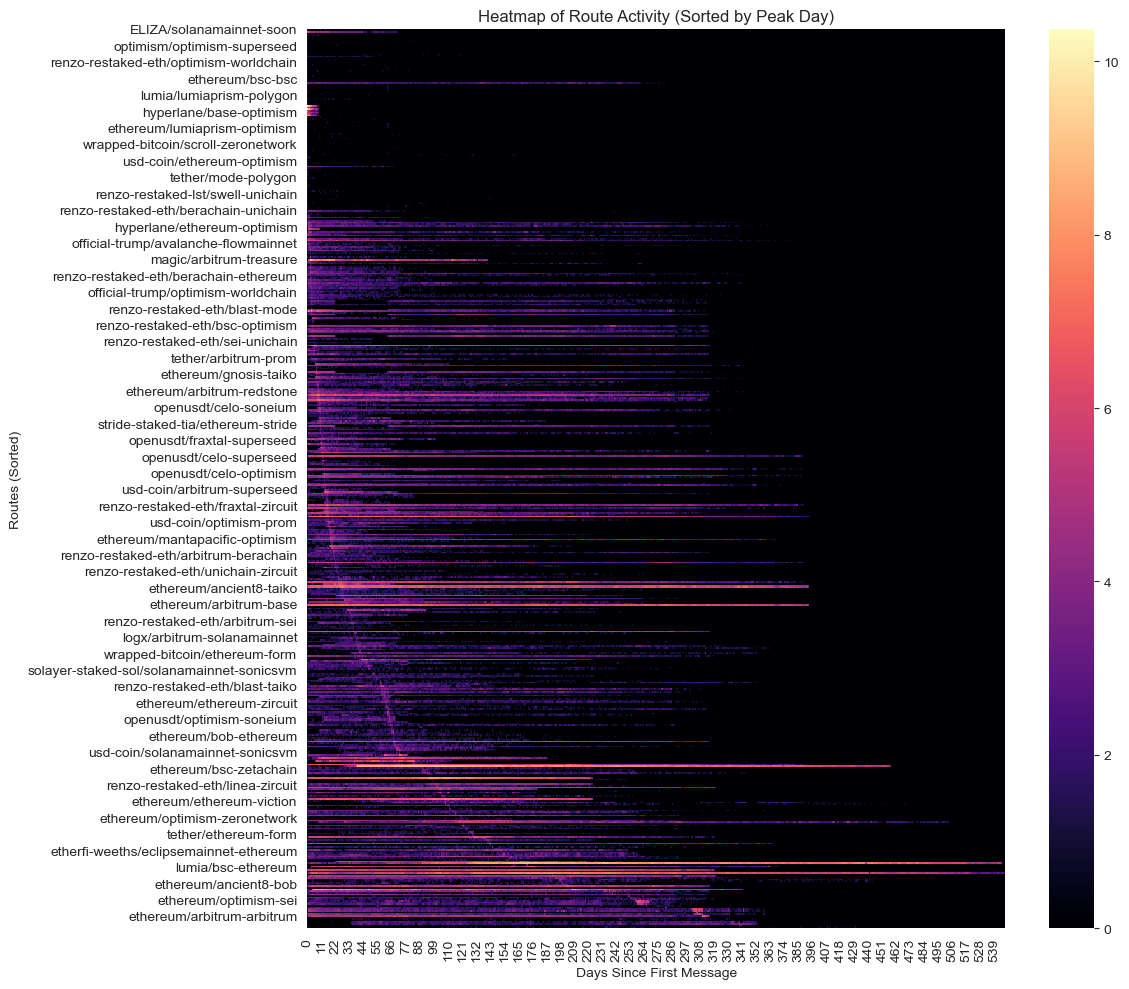

In [228]:
pivot = cohort_complete.pivot(index='route_id', columns='days_since_first_message', values='messages_sent').fillna(0)

# Heatmap of all routes, sorted by peak day
pivot['peak_day'] = pivot.idxmax(axis=1)
sorted_pivot = pivot.sort_values('peak_day').drop(columns='peak_day')

# Apply log scale transformation
log_heatmap_data = np.log1p(sorted_pivot)  # log(x + 1) to avoid log(0)

plt.figure(figsize=(12, 10))
sns.heatmap(log_heatmap_data, cmap='magma', cbar=True)
plt.title('Heatmap of Route Activity (Sorted by Peak Day)')
plt.xlabel('Days Since First Message')
plt.ylabel('Routes (Sorted)')
plt.tight_layout()